In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook
plt.ion()

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1)

In [4]:
G.add_nodes_from([2,3])

In [5]:
H = nx.path_graph(10)
G.add_nodes_from(H)               #Graph G contains the nodes of H 

In [6]:
G.add_node(H)                     #H is used as the node in the graph G

In [7]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

In [8]:
G.add_edges_from([(1, 2), (1, 3)])       #add a list of edges

In [9]:
G.add_edges_from(H.edges)

In [10]:
G.clear()

In [11]:
G.add_edges_from([(1, 2), (1, 3)])            #If the nodes of the edge is not present then it will add the nodes in the graph
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [12]:
G.edges

EdgeView([(1, 2), (1, 3), (3, 'm')])

In [13]:
G.number_of_nodes()

8

In [14]:
G.number_of_edges()

3

In [15]:
G.node

NodeView((1, 2, 3, 'spam', 's', 'p', 'a', 'm'))

In [16]:
G.edges

EdgeView([(1, 2), (1, 3), (3, 'm')])

In [17]:
G.adj

AdjacencyView({1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}, 'm': {}}, 'spam': {}, 's': {}, 'p': {}, 'a': {}, 'm': {3: {}}})

In [18]:
G.degree

DegreeView({1: 2, 2: 1, 3: 2, 'spam': 0, 's': 0, 'p': 0, 'a': 0, 'm': 1})

In [19]:
list(G.adj[1])

[2, 3]

In [20]:
G.degree[1]  # the number of edges incident to 1

2

In [21]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [22]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

In [23]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

In [24]:
G.remove_edge(1, 3)

In [25]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [26]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

In [27]:
G[1]

AtlasView({2: {}})

In [28]:
G[1][2]

{}

In [29]:
G.edges[1,2]

{}

In [30]:
G.add_edge(1,3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"

In [31]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [32]:
for (u, v, wt) in FG.edges.data('weight'):
     if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


In [33]:
FG.edges.data('weight')

EdgeDataView([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

In [34]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [35]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [36]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [37]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [38]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [39]:
G[n]

AtlasView({3: {'color': 'red', 'weight': 4.2}, 5: {'color': 'red'}})

In [40]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')


0.5

In [41]:
DG.degree(1, weight='weight')


1.25

In [42]:
list(DG.successors(1))


[2]

In [43]:
list(DG.neighbors(1))

[2]

In [44]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [45]:
GG = nx.Graph()

In [46]:
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

In [47]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

In [48]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

In [49]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

In [50]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

In [51]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [52]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [53]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [54]:
sp = dict(nx.all_pairs_shortest_path(G))

In [55]:
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

In [56]:
import matplotlib.pyplot as plt

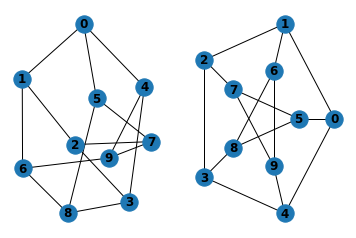

In [57]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

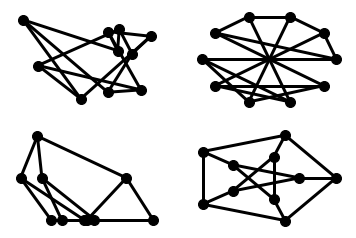

In [58]:
options = {
     'node_color': 'black',
     'node_size': 100,
     'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

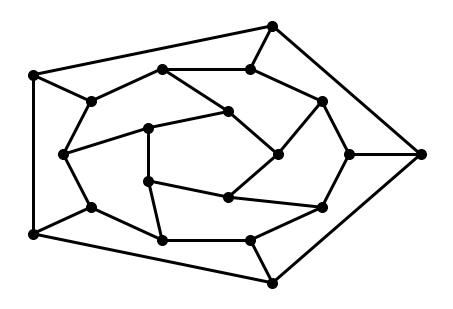

In [59]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

[1.0, 0.25, 0.25, 0.5714285714285714, 0.25, 0.25, 0.0, 0.25]


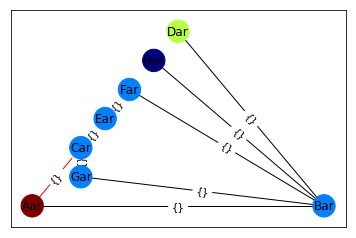

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]
print(values)

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.drawing.layout.planar_layout(G )
# edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                    node_color = values, node_size = 500)
nx.draw_networkx_edge_labels(G , pos = nx.planar_layout(G) )
labels = {}
for x in G.nodes:
    labels[x] = x + 'ar'
nx.draw_networkx_labels(G, pos , labels = labels)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, width=1 ,edge_color='r', arrows=False)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)

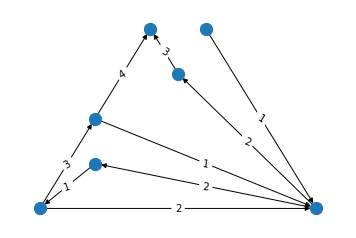

In [61]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.DiGraph()

G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)


val_map = {'A': 1.0,
                   'D': 0.5714285714285714,
                              'H': 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.planar_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_size=150)
pylab.show()

In [63]:
a = [val_map.get(node, 0.45) for node in G.nodes()]

In [64]:
a

[1.0, 0.45, 0.45, 0.5714285714285714, 0.45, 0.45, 0.45]

In [65]:
G.nodes()

NodeView(('A', 'B', 'C', 'D', 'G', 'E', 'F'))

In [66]:
val_map.get('C' , 0.55)

0.55

In [67]:
G.edges(data = True)

OutEdgeDataView([('A', 'B', {'weight': 1}), ('B', 'D', {'weight': 2}), ('B', 'C', {'weight': 3}), ('C', 'D', {'weight': 1}), ('C', 'F', {'weight': 4}), ('D', 'A', {'weight': 2}), ('D', 'E', {'weight': 2}), ('G', 'D', {'weight': 1}), ('E', 'F', {'weight': 3})])

In [68]:
G = nx.path_graph(4)
pos = nx.planar_layout(G)

In [69]:
nx.__version__

'2.3'

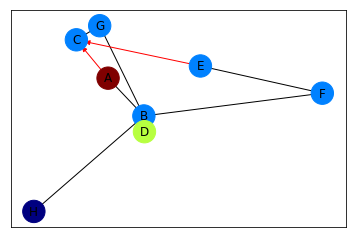

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()
